# Proyek Analisis Data:products_dataset
- **Nama:** [Urwah Hasan Hizbullah]
- **Email:** [hasanhizbullah18@gmail.com]
- **ID Dicoding:** [Hasan Hizbullah]

## Menentukan Pertanyaan Bisnis

- 1.Kategori produk apa yang memiliki jumlah produk terbanyak?.

- 2.Bagaimana hubungan antara berat produk dan fisiknya, dan kategori mana yang paling memiliki karakteristik paling unik dan ekstrim?.

## Import Semua Packages/Library yang Digunakan

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [4]:
import pandas as pd

products_file_path = '/content/products_dataset.csv'
products_df = pd.read_csv(products_file_path, sep=';')

tranlation_file_path = '/content/product_category_name_translation.csv'
translation_df = pd.read_csv(tranlation_file_path)

display(products_df.head())

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [5]:
translation_df = pd.read_csv('/content/product_category_name_translation.csv')
display(translation_df.head())

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


**Insight:**
- Dataset ini berisi informasi tentang atribut produk seperti kategori, panjang nama/deskripsi, jumlah foto, berat, dan dimensi fisik.
- Nama kategori masih dalam bahasa portugis, yang mungkin perlu diterjemahkan untuk analisis mendalam

### Assessing Data

In [6]:

print(products_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
None


In [7]:
print(products_df.duplicated().sum())

0


jumlah duplikasi 0

In [8]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


**Insight:**
- Kolom atribut produk seperti panjang nama/deskripsi, jumlah foto, berat, dan dimensi yang memiliki missing values yang yang lebih sedikit (antara 2 hingga 20 missing values)
- Tidak ada duplikasi data

### Cleaning Data

In [9]:
product_df = pd.merge (products_df, translation_df,
                       on='product_category_name',
                       how = 'left')
print("---Data Setelah Merge Terjemahan---")
display(product_df[['product_category_name', 'product_category_name_english']].head())

---Data Setelah Merge Terjemahan---


,product_category_name,product_category_name_english
0,perfumaria,perfumery
1,artes,art
2,esporte_lazer,sports_leisure
3,bebes,baby
4,utilidades_domesticas,housewares


**#Penerjemahan dari bahasa portugis ke bahasa inggris**

In [10]:
print('Missing values before cleaning:')
print(product_df.isnull().sum())

numerical_cols = ['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm',
                  'product_name_lenght', 'product_description_lenght', 'product_photos_qty']
for col in numerical_cols:
    if product_df[col].isnull().any():
        product_df[col].fillna(product_df[col].median(), inplace=True)

if product_df['product_category_name_english'].isnull().any():
    product_df['product_category_name_english'].fillna('Unknown', inplace=True)


if product_df['product_category_name'].isnull().any():
    mode_category_pt = product_df['product_category_name'].mode()[0]
    product_df['product_category_name'].fillna(mode_category_pt, inplace=True)

print('\nMissing values after cleaning all identified columns:')
print(product_df.isnull().sum())

Missing values before cleaning:
product_id                         0
product_category_name            610
product_name_lenght              610
product_description_lenght       610
product_photos_qty               610
product_weight_g                   2
product_length_cm                  2
product_height_cm                  2
product_width_cm                   2
product_category_name_english    623
dtype: int64

Missing values after cleaning all identified columns:
product_id                       0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
product_category_name_english    0
dtype: int64


/tmp/ipython-input-1027859153.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  product_df[col].fillna(product_df[col].median(), inplace=True)
/tmp/ipython-input-1027859153.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace

In [11]:
product_df.isna().sum()

,0
product_id,0
product_category_name,0
product_name_lenght,0
product_description_lenght,0
product_photos_qty,0
product_weight_g,0
product_length_cm,0
product_height_cm,0
product_width_cm,0
product_category_name_english,0


In [12]:
product_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000
mean,48.523656,768.227945,2.166975,2276.376802,30.814725,16.937422,23.196534
std,10.156155,629.658469,1.728063,4281.926387,16.914005,13.637175,12.078707
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,344.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,961.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


**Insight:**
- **Data Gathering:** Data gathering berhasil dilakukan dan kolom 'product_category_name_english' tersedia untuk dianalsis.

- **Missing Values:** Nilai hilang di coloumn numerik diatasi menggunakan imputasi median.

## Exploratory Data Analysis (EDA)

In [13]:
products_df.head()
products_df.info()
products_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


### Explore ...

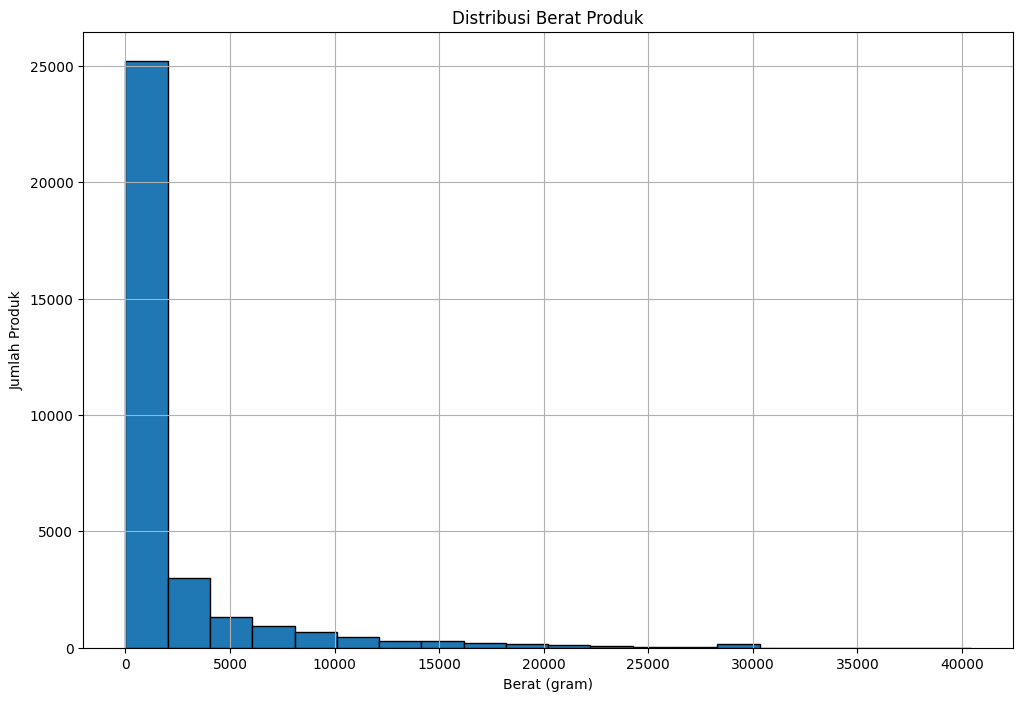

In [25]:
plt.figure(figsize=(12, 8))
product_df['product_weight_g'].hist(bins=20, edgecolor='black')
plt.title("Distribusi Berat Produk")
plt.xlabel("Berat (gram)")
plt.ylabel("Jumlah Produk")
plt.show()


Text(0, 0.5, 'Jumlah Produk')

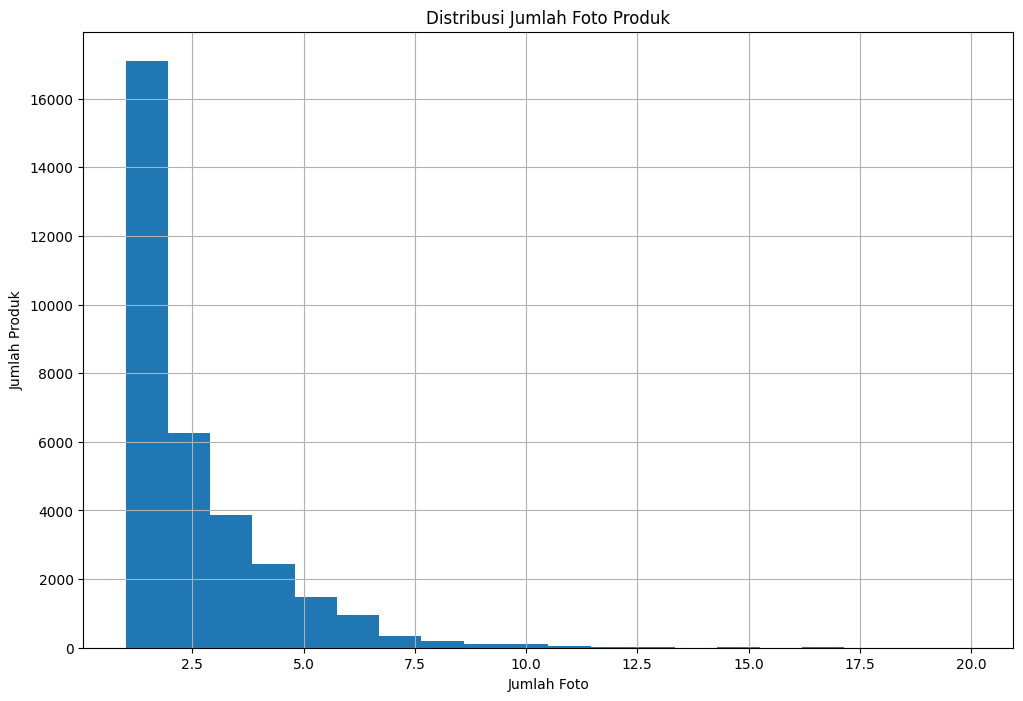

In [26]:
plt.figure(figsize=(12, 8))
product_df['product_photos_qty'].hist(bins=20)
plt.title("Distribusi Jumlah Foto Produk")
plt.xlabel("Jumlah Foto")
plt.ylabel("Jumlah Produk")

In [14]:
products_df.sample(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
14376,9095cc132e4b4b51fc6c86fd7ba352b1,moveis_decoracao,43.0,1090.0,1.0,2000.0,40.0,20.0,28.0
20073,b453858c312812141a610b1f511f609e,perfumaria,53.0,158.0,1.0,450.0,25.0,10.0,18.0
23746,60f560fe3dd8adc165becf182ec8f834,esporte_lazer,48.0,236.0,2.0,3450.0,60.0,15.0,15.0
23628,0210b75f6f4de09dfc17a66803290f8a,bebidas,33.0,2245.0,1.0,1800.0,35.0,20.0,20.0
21972,2db85e45ff15b96518baa00fdacdc6c6,beleza_saude,45.0,274.0,2.0,300.0,22.0,12.0,17.0


In [15]:
kategori_produk_10_teratas = product_df['product_category_name_english'].value_counts().head(10)
print("\n 10 kategori produk berdasakan jumlah produk:")
print(kategori_produk_10_teratas)


 10 kategori produk berdasakan jumlah produk:
product_category_name_english
bed_bath_table           3029
sports_leisure           2867
furniture_decor          2657
health_beauty            2444
housewares               2335
auto                     1900
computers_accessories    1639
toys                     1411
watches_gifts            1329
telephony                1134
Name: count, dtype: int64


In [16]:
product_df.groupby('product_category_name_english').size().sort_values(ascending=False)

,0
product_category_name_english,
bed_bath_table,3029
sports_leisure,2867
furniture_decor,2657
health_beauty,2444
housewares,2335
...,...
tablets_printing_image,9
home_comfort_2,5
fashion_childrens_clothes,5


**Insight:**
- (perlengkapan tidur, meja, dan alat mandi) adalah kategori dengan produk terbanayak
- diikuti dengan (Olahraga & kenyamanan)

## Visualization & Explanatory Analysis

### Pertanyaan 1: Kategori produk apa yang memiliki jumlah produk terbanyak?.

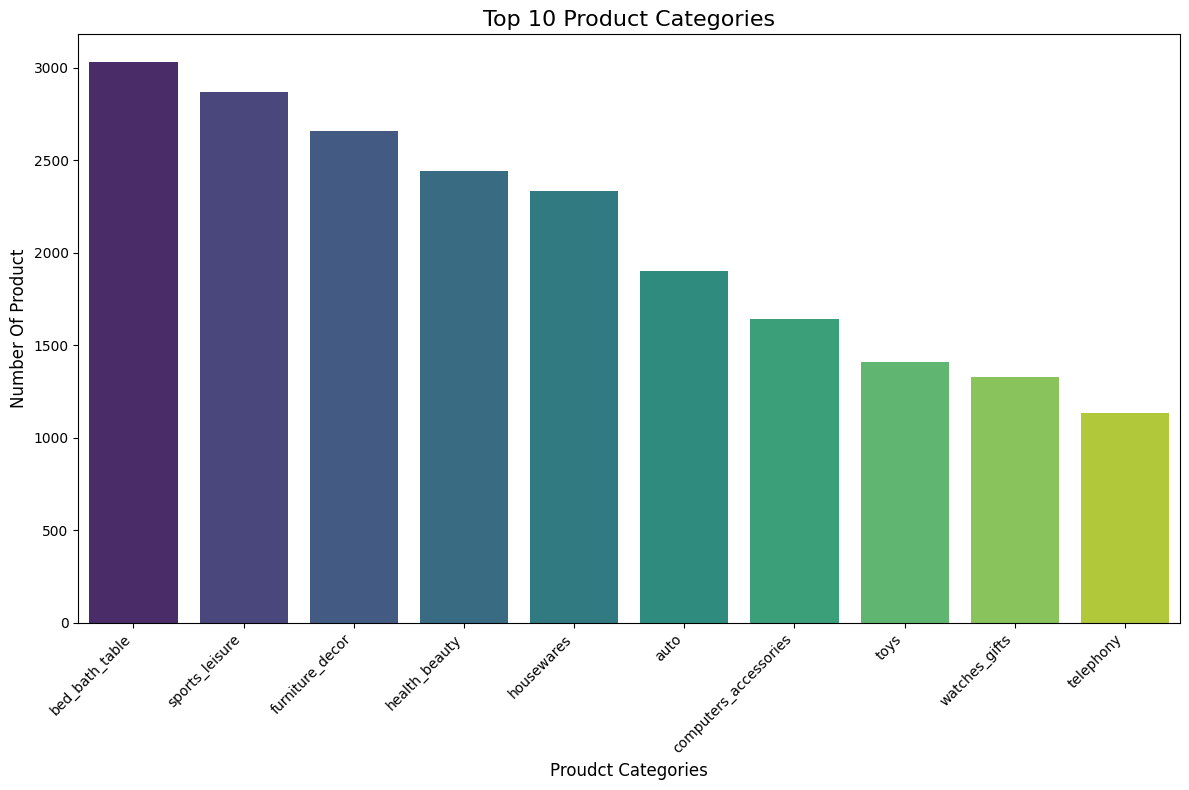

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.barplot(x=kategori_produk_10_teratas.index,
            y=kategori_produk_10_teratas.values,
            hue=kategori_produk_10_teratas.index,
            palette='viridis',
            legend=False)
plt.title('Top 10 Product Categories', fontsize=16)

plt.xlabel('Proudct Categories', fontsize=12)
plt.ylabel('Number Of Product', fontsize=12)
plt.xticks(rotation=45, ha='right') # Memastikan label tidak tumpang tindih
plt.tight_layout()
plt.show()

**insight pertanyaan 1:**
- Kategori bath_bed_table merupakan kategori dengan jumlah terbanyak dalam dataset, menunjukan bahwa produk bath_bed_table memiliki jumlah variasi yang besar.
- kategori produk terbanyak berikutnya yaitu sports_leisure dan computers_accessories, yang menunjukan tingginya permintaan dan keragaman produk pada kebutuhan  rumah tangga dan gaya hidup


### Pertanyaan 2: Bagaimana hubungan antara berat produk dan fisiknya, dan kategori mana yang paling memiliki karakteristik paling unik dan ekstrim?.

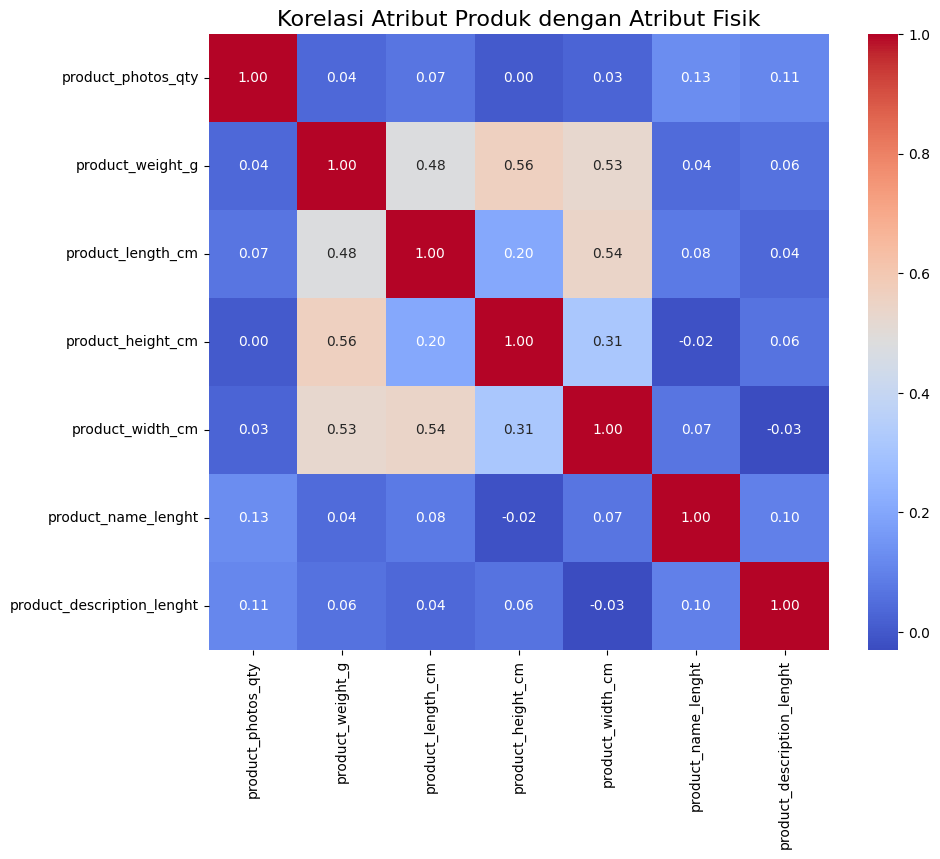

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_cols = ['product_photos_qty',
                    'product_weight_g',
                    'product_length_cm',
                    'product_height_cm',
                    'product_width_cm',
                    'product_name_lenght',
                    'product_description_lenght']

correlatiom_data = product_df[correlation_cols]

plt.figure(figsize=(10, 8))
sns.heatmap(correlatiom_data.corr(), cmap= 'coolwarm', annot= True, fmt=".2f", annot_kws={'size': 10})
plt.title('Korelasi Atribut Produk dengan Atribut Fisik', fontsize=16)
plt.show()

In [30]:
top_heaviest = product_df.groupby('product_category_name_english')['product_weight_g'].mean().sort_values(ascending=False).head(10)
top_heaviest


,product_weight_g
product_category_name_english,
furniture_mattress_and_upholstery,13190.000000
office_furniture,12740.867314
kitchen_dining_laundry_garden_furniture,11598.563830
furniture_bedroom,9997.222222
home_appliances_2,9913.333333
furniture_living_room,8934.846154
computers,7995.333333
industry_commerce_and_business,5929.191176
agro_industry_and_commerce,5263.405405


In [33]:
tp_lightest = product_df.groupby('product_category_name_english')['product_weight_g'].mean().sort_values().head(10)
top_lightest


,product_weight_g
product_category_name_english,
telephony,236.506173
fashion_childrens_clothes,324.000000
fashion_sport,344.736842
fashion_underwear_beach,362.264151
tablets_printing_image,381.444444
dvds_blu_ray,381.562500
fashion_bags_accessories,426.764429
watches_gifts,509.287434
perfumery,529.256912


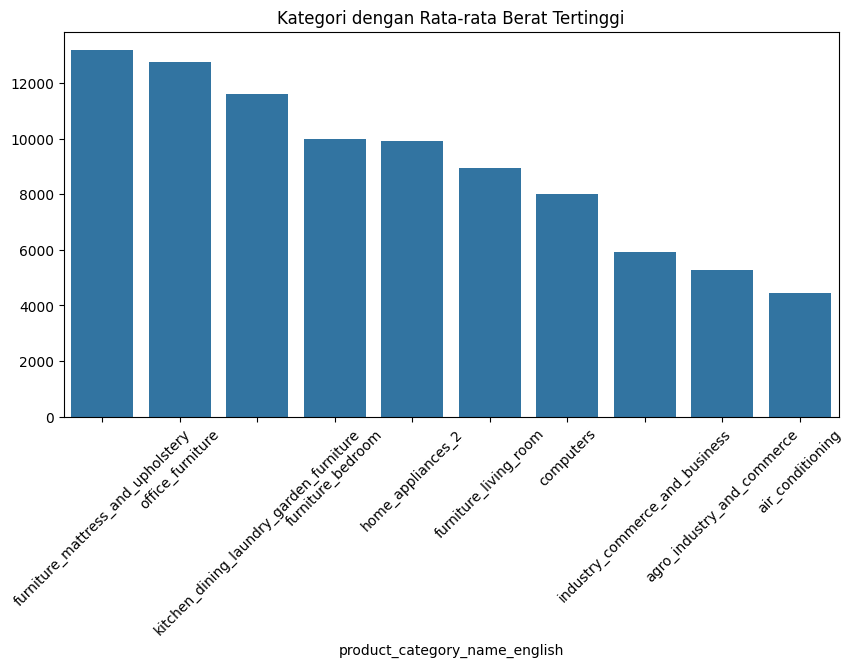

In [32]:
plt.figure(figsize=(10,5))
sns.barplot(x=top_heaviest.index, y=top_heaviest.values)
plt.xticks(rotation=45)
plt.title("Kategori dengan Rata-rata Berat Tertinggi")
plt.show()


**Insight pertanyaan 2:**
- Kategori paling berat rata ratanya adalah ('furniture_mattress_and_upholstery')dengan berat rata-rata 13190 gram.
- Kategori produk paling ringan adalah ('telephony') dengan rata-rata 236 gram.
- Menunjukan bahwa furniture memiliki dimensi besar dan berat sedangkan stationary kecil dan ringan.

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution Pertanyaan 1:

Kategori produk dengan jumlah produk terbanyak adalah bath_bed_table, yang mencakup perlengkapan rumah tangga seperti peralatan tidur, kamar mandi, dan meja. Banyaknya variasi pada kategori ini menunjukkan bahwa produk-produk rumah tangga memiliki permintaan tinggi serta ragam yang luas, sehingga menjadi salah satu fokus utama dalam inventaris.


- Conclution pertanyaan 2 : Berdasrkan hasil analisis hubungan antara berat produk dan dimensi fisiknya, ditemukan terdapat korelasi kuat antara berat product(weight) dengan panjang (length), lebar(width), dan tinggi (hight).
Artinya semakin berat besar ukuran fisik maka semakin berat produnya.
Dari hasil perhitungan rata-rata berat perkategori:
1. furniture_mattress_and_upholstery berat = 13.190 gram
2. office_furniture berat =  12.740 gram
3. kitchen_lanudry_garde_furniture berat = 11.598.  

Kategori produk yang paling ringan:
1. telephony berat = 236.50 gram
2. fashion_children_clothes berat = 324 grsm
3. fashion_sport berat = 344,73 gram.

Makna dari temuan ini

Hal ini menunjukkan bahwa karakteristik fisik suatu kategori produk sangat memengaruhi bobotnya. Informasi ini dapat dimanfaatkan untuk:

pengelolaan inventaris,

perencanaan ruang penyimpanan,

penataan produk di gudang,

dan pengaturan ongkos logistik berdasarkan bobot.

**Kesimpulan Akhir**

Secara keseluruhan, analisis ini menunjukkan bahwa:

Kategori produk terbanyak berada pada kebutuhan rumah tangga (bath_bed_table).

Berat produk sangat dipengaruhi oleh dimensi fisiknya.

Kategori furniture dan produk rumah tangga memiliki karakteristik fisik paling berat.

Kategori seperti telephony dan children fashion termasuk kategori paling ringan.

Hasil analisis ini dapat digunakan untuk:

pengelolaan inventaris,

perencanaan distribusi & logistik,

penataan gudang berdasarkan berat,

serta optimasi biaya pengiriman.


In [19]:
output_file_path = 'cleaned_products_data.csv'
product_df.to_csv(output_file_path, index=False)
print(f"DataFrame saved to {output_file_path}")

DataFrame saved to cleaned_products_data.csv
